<a href="https://colab.research.google.com/github/tomollow/Feel-and-Think/blob/main/One_Class_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ライブラリのインポート

In [ ]:
# ライブラリのインポート
from sklearn.svm import OneClassSVM
import numpy as np
import matplotlib.pyplot as plt

### 正常なデータ（ガウシアン分布に従う）の生成

In [ ]:
# 正常なデータ（ガウシアン分布に従う）の生成
np.random.seed(42)
X_normal = 0.3 * np.random.randn(100, 2)
X_normal = np.r_[X_normal + 2, X_normal - 2]

### 異常なデータ（一様分布に従う）の生成

In [ ]:
# 異常なデータ（一様分布に従う）の生成
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

### データの結合

In [ ]:
# データの結合
X = np.r_[X_normal, X_outliers]

### One-Class SVMの学習

In [ ]:
# One-Class SVMの学習
clf = OneClassSVM(kernel="rbf", gamma=0.1, nu=0.1)
clf.fit(X_normal)

### データポイントの異常スコアの計算

In [ ]:
# データポイントの異常スコアの計算
y_pred = clf.decision_function(X)
threshold = np.percentile(y_pred, 10)  # 異常スコアの閾値

### メッシュグリッドの作成

In [ ]:
# メッシュグリッドの作成
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

### 可視化

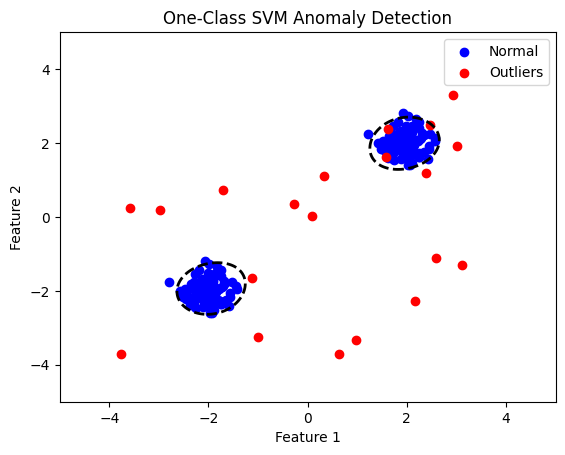

In [ ]:
# 可視化
plt.scatter(X_normal[:, 0], X_normal[:, 1], c='b', label="Normal")
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='r', label="Outliers")
plt.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='black')
plt.legend()
plt.title("One-Class SVM Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()